#Лабораторная работа № 3. Решние линейных и нелинейных систем разными методами
 Вариант №5 \\
 Завадский Никита Валерьевич

In [1]:
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

#1
Создать матрицу $4х4$ из случайных целых чисел из отрезка $[-8, 8]$. Методом Грама-Шмидта ортогонализовать первые два столбца матрицы. Найти $QR$ разложение матрицы методом Грама-Шмидта. Проверить методом $np.linalg$


создание матрицы

In [2]:
A1 = np.random.randint(-8,8,(4,4))
print(A1)

[[-8  1 -2 -5]
 [ 0 -8 -3 -6]
 [-4 -3 -1 -8]
 [ 0 -6  7  5]]


Ортогонализация первых двух столбцов

In [3]:
a1 = A1[:,0]
a2 = A1[:,1]

g1 = a1
g2 = a2 - g1 * ((a2 @ g1) / (g1 @ g1))

print("Проверка на ортогонализацию:", g1 @ g2)

E = np.zeros((4,4))
E[:,0] = g1 / np.linalg.norm(g1)
E[:,1] = g2 / np.linalg.norm(g2)
print("Ортогонализированная матрица: \n",E)

Проверка на ортогонализацию: 0.0
Ортогонализированная матрица: 
 [[-0.89442719  0.13360628  0.          0.        ]
 [ 0.         -0.76346445  0.          0.        ]
 [-0.4472136  -0.26721256  0.          0.        ]
 [ 0.         -0.57259833  0.          0.        ]]


функция нахождение $QR$ методом Грама-Шмидта

In [4]:
def QR_decay(A):
  n, m = A.shape

  Q = np.empty((n, n))
  u = np.empty((n, n))

  u[:, 0] = A[:, 0]
  Q[:, 0] = u[:, 0] / np.linalg.norm(u[:, 0])

  for i in range(1, n): ## Находим матрицу Q через Алгоритм Грамма-Шмидта

      u[:, i] = A[:, i]
      for j in range(i):
          u[:, i] -= (A[:, i] @ Q[:, j]) * Q[:, j] ## @ - матричное умножение

      Q[:, i] = u[:, i] / np.linalg.norm(u[:, i])

  R = np.zeros((n, m))
  for i in range(n):
      for j in range(i, m):
          R[i, j] = A[:, j] @ Q[:, i] ## Находим матрицу R

  return Q, R

находим $QR$ своей функцией

In [5]:
Q1, R1 = QR_decay(A1)
print("\nQ:\n", Q1)
print("\nR:\n", R1)


Q:
 [[-0.89442719  0.13360628  0.03093305  0.42566713]
 [ 0.         -0.76346445 -0.58109948  0.28186067]
 [-0.4472136  -0.26721256 -0.0618661  -0.85133427]
 [ 0.         -0.57259833  0.81088786  0.12079743]]

R:
 [[ 8.94427191  0.4472136   2.23606798  8.04984472]
 [ 0.         10.47854952 -1.717795    3.18746406]
 [ 0.          0.          7.41951348  7.88129976]
 [ 0.          0.          0.          3.5951616 ]]


Проверка QR_decay

In [6]:
Q_np, R_np = np.linalg.qr(A1)
print("\nQ:\n", Q_np)
print("\nR:\n", R_np)


Q:
 [[-0.89442719  0.13360628 -0.03093305  0.42566713]
 [ 0.         -0.76346445  0.58109948  0.28186067]
 [-0.4472136  -0.26721256  0.0618661  -0.85133427]
 [ 0.         -0.57259833 -0.81088786  0.12079743]]

R:
 [[ 8.94427191  0.4472136   2.23606798  8.04984472]
 [ 0.         10.47854952 -1.717795    3.18746406]
 [ 0.          0.         -7.41951348 -7.88129976]
 [ 0.          0.          0.          3.5951616 ]]


#2
Решить систему с помощью $QR$ разложения матрицы $А$. $QR$ разложение найти методом Грама-Шмидта. Проверить полученное решение непосредственной подстановкой в исходную систему, а также методом $np.solve$
$$\begin{cases}
15.7x_1+6.6x_2-5.7x_3+11.5x_4=-2.4\\
8.8x_1-6.7x_2+5.5x_3-4.5x_4=5.6\\
6.3x_1-5.7x_2-23.4x_3+6.6x_4=7.7\\
14.3x_1+8.7x_2-15.7x_3-5.8x_4=23.4
\end{cases}$$

создание матриц

In [7]:
A2 = np.array([[15.7, 6.6, -5.7, 11.5],
               [8.8, -6.7, 5.5, -4.5],
               [6.3, -5.7, -23.4, 6.6],
               [14.3, 8.7, -15.7, -5.8]])
B2 = np.array([-2.4, 5.6, 7.7, 23.4])
print("A:\n", A2, "\nB:\n", B2)

A:
 [[ 15.7   6.6  -5.7  11.5]
 [  8.8  -6.7   5.5  -4.5]
 [  6.3  -5.7 -23.4   6.6]
 [ 14.3   8.7 -15.7  -5.8]] 
B:
 [-2.4  5.6  7.7 23.4]


нахождение $QR$ разложение матрицы $A$

In [8]:
Q2, R2 = QR_decay(A2)
print("Q:\n", Q2, "\nR:\n", R2)

Q:
 [[ 0.65869359  0.22703847  0.22835537  0.68002215]
 [ 0.36920405 -0.68130742  0.54837989 -0.3143057 ]
 [ 0.26431654 -0.55799546 -0.7641074   0.18686282]
 [ 0.59995658  0.41583026 -0.25154165 -0.63550302]] 
R:
 [[ 23.83505821   5.58672854 -17.3282564    4.178299  ]
 [  0.          12.86151096   1.48724863  -0.4177598 ]
 [  0.           0.          23.54378096  -3.42579006]
 [  0.           0.           0.          14.15384247]]


решаем систему $RX = Q^{T}B$

In [9]:
def reverse(A,B):
  n = np.size(B)
  x = np.zeros_like(B)
  for i in range(n-1, -1, -1): x[i] = (B[i] - np.sum(A[i,i+1:] * x[i+1:]))/A[i,i]
  return x

In [10]:
X2 = reverse(R2, Q2.T @ B2)
print(X2)

[ 0.46606121  0.11028446 -0.56570877 -1.188659  ]


проверяем полученное решение непосредственной подстановкой в исходную систему

In [11]:
print("AX:", A2 @ X2, "\n B:", B2)

AX: [-2.4  5.6  7.7 23.4] 
 B: [-2.4  5.6  7.7 23.4]


проверяем полученное решение методом $np.solve$

In [12]:
print("       X:", X2, "\nnp.solve:", np.linalg.solve(A2, B2))

       X: [ 0.46606121  0.11028446 -0.56570877 -1.188659  ] 
np.solve: [ 0.46606121  0.11028446 -0.56570877 -1.188659  ]


#3
Решить систему методом Зейделя с точностью до $10^{-3}$. Проверить выполнение достаточного условия сходимости. Если условие не выполняется, в программе выполнить эквивалентные реобразования системы, после этого привести к удобному для итераций виду. Оформить итерации в виде таблицы (можно пользоваться модулями PrettyTable или Pandas). Проверить полученное решение.
$$\begin{cases}
6.15x_1-1.72x_2-1.23x_3=2.15\\
0.72x_1+5.67x_2+1.18x_3=1.43\\
2.57x_1-1.34x_2-3.68x_3=1.03
\end{cases}$$


создаём матрицы

In [13]:
A3 = np.array([[6.15, -1.72, -1.23],
               [0.72, 5.67, 1.18],
               [2.57, -1.34, -3.68]])
B3 = np.array([2.15, 1.43, 1.03])
e = 1e-3
print("A:\n", A3, "\nB:\n", B3)

A:
 [[ 6.15 -1.72 -1.23]
 [ 0.72  5.67  1.18]
 [ 2.57 -1.34 -3.68]] 
B:
 [2.15 1.43 1.03]


Преобразование системы к виду $X^{k+1}=D_1X^{k+1}+D_2X^k+C$

In [14]:
n = len(B3)
C = np.array([B3[i]/A3[i][i] for i in range(n)])
D1 = np.zeros_like(A3)
D2 = np.zeros_like(A3)
for i in range(n):
  for j in range(n):
    d = -A3[i][j] / A3[i][i]
    if i > j: D1[i][j] = d
    if i < j: D2[i][j] = d

print("D1:\n", D1, "\nD2:\n", D2, "\nC:\n", C)

D1:
 [[ 0.          0.          0.        ]
 [-0.12698413  0.          0.        ]
 [ 0.69836957 -0.36413043  0.        ]] 
D2:
 [[ 0.          0.2796748   0.2       ]
 [ 0.          0.         -0.20811287]
 [ 0.          0.          0.        ]] 
C:
 [ 0.3495935   0.25220459 -0.2798913 ]


проверка сходимости метода ($max|d_{ij}$|<1)



In [15]:
D = D1 + D2
d_max = np.max(np.abs(D))
if d_max < 1: print(d_max, "< 1 => метод сходиться")
else: print(d_max, "> 1 => метод не сходиться")

0.6983695652173912 < 1 => метод сходиться


функция для итерационного вычисления

In [16]:
def iter(X_old):
  X_new = np.zeros_like(X_old)
  for i in range(n):
    X_new[i] = C[i] + D1[i] @ X_new + D2[i] @ X_old
  return X_new

решаем систему с точностью до $10^{-3}$

In [17]:
table = PrettyTable()
table.field_names = ["Iter"] + [f"x_{i+1}" for i in range(n)] + ["norma(x_k - x_k-1)"]

i = 0
norma = np.inf
x_old = np.zeros(n)

table.add_row([i] + [x_old[i] for i in range(len(x_old))] + [''])

while e < norma:
  i += 1
  x_new = iter(x_old)
  norma = np.max(np.abs(x_new - x_old))
  table.add_row([i] + [x_new[j] for j in range(3)] + [norma])
  x_old = x_new.copy()


print(table)

+------+--------------------+---------------------+----------------------+-----------------------+
| Iter |        x_1         |         x_2         |         x_3          |   norma(x_k - x_k-1)  |
+------+--------------------+---------------------+----------------------+-----------------------+
|  0   |        0.0         |         0.0         |         0.0          |                       |
|  1   | 0.3495934959349593 |  0.2078117606572891 | -0.11141643334997883 |   0.3495934959349593  |
|  2   | 0.3854299211886281 |  0.2264482977243673 | -0.09317549497170602 |  0.03583642525366881  |
|  3   | 0.3942902785806038 |  0.2215269988516011 | -0.08519569633396576 |  0.00886035739197566  |
|  4   | 0.3945098750461749 | 0.21983841475146976 | -0.08442747198323375 | 0.0016885841001313406 |
|  5   | 0.3941912655013252 | 0.21971899572826484 | -0.08460649509170359 | 0.0003186095448496906 |
+------+--------------------+---------------------+----------------------+-----------------------+


проверка решения

In [18]:
print((A3@x_new)-B3)

[ 0.0004256  -0.00021125  0.        ]


#4
Решить нелинейное уравнение методом хорд с точностью $10^{-4}$ и комбинированным методом с точностью $10^{-5}$. До решения отделить корни графическим методом, проверить выполнение условий метода.

$-2.7x^3-1.48x^2+19.23x+6.35,\ x\in[-4, 4]$


определим функцию

In [19]:
def f(x):
    return -2.7 * x**3 - 1.48 * x**2 + 19.23 * x + 6.35

стоим график функции

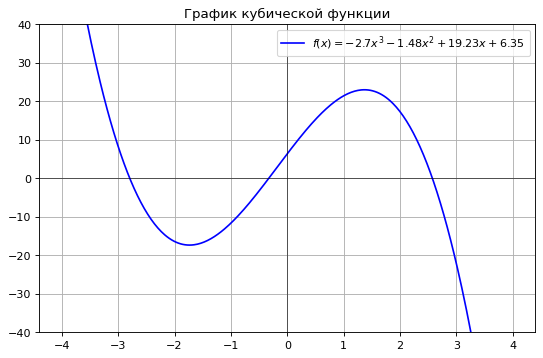

In [20]:
x = np.linspace(-4, 4, 400)
y = f(x)

plt.figure(figsize=(8, 5), dpi=80)
plt.plot(x, y, label=r'$f(x) = -2.7x^3 - 1.48x^2 + 19.23x + 6.35$', color='blue')
plt.title('График кубической функции')
plt.ylim(-40, 40)
plt.grid()
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

На интервале [2,3] функция имеет единственное решение.
Проверим условия сходимости для каждого метода

In [21]:
a, b = 2, 3
x = np.linspace(a, b, 100)
df = np.gradient(f(x), x)
d2f = np.gradient(df, x)

sgn = (f(a)*f(b)<0)
dif1 = (np.all(df)>0 or np.all(df)<0)
dif2 = (np.all(d2f)>0 or np.all(d2f)<0)

if sgn and dif1 and dif2: print("методы сходятся")
else: print("методы не сходятся")

методы сходятся


**МЕТОД ХОРД**

---


выбираем формулу для вычисления проверкой $f'f'' < 0$ или $f'f'' > 0$

In [25]:
dif = np.all(df)*np.all(d2f)
if dif < 0: print("f'f'' < 0")
else: print("f'f'' > 0")

f'f'' > 0


$f'f''>0 =>$ используем формулу: $$x_{n+1}=x_n-\frac{(b-x_n)f(x_n)}{f(b)-f(x_n)}$$  
 $$$$ Напишем функцию для вычисления $x_{n+1}$ по данной формуле

In [40]:
def iter_hord(x):
  return x - ((b - x) * f(x))/(f(b) - f(x))

решаем методом хорд и для оценки точности приближения воспользуемся формулой: $|x_n-x_{n-1}|<10^{-4}$

In [74]:
table = PrettyTable()
table.field_names = ["Iter"] + ["x"] + ["|x_n - x_n-1|"]

e = 1e-4
i = 0
n = np.inf
x_old = a

table.add_row([i] + [x_old] + ['-'])

while e < n:
  i += 1
  x_new = iter_hord(x_old)
  n = np.abs(x_new - x_old)
  table.add_row([i] + [x_new] + [n])
  x_old = x_new


print(table)
print()
res_hord = x_new
print("Ответ методом хорд:", res_hord)

+------+--------------------+------------------------+
| Iter |         x          |     |x_n - x_n-1|      |
+------+--------------------+------------------------+
|  0   |         2          |           -            |
|  1   | 2.4380542183937166 |   0.4380542183937166   |
|  2   | 2.5465664038848144 |  0.10851218549109776   |
|  3   | 2.5686134787130537 |  0.02204707482823931   |
|  4   | 2.5728973537239734 |  0.004283875010919758  |
|  5   | 2.573722377650408  |  0.000825023926434465  |
|  6   | 2.5738809948205756 | 0.0001586171701677408  |
|  7   | 2.5739114801069336 | 3.0485286357961883e-05 |
+------+--------------------+------------------------+

Ответ методом хорд: 2.5739114801069336


**КОМБИНИРОВАННЫЙ МЕТОД**

---


выбираем формулу для вычисления проверкой $f'f'' < 0$ или $f'f'' > 0$ $$$$ Аналогично с методом хорд $f'f'' > 0$, а значит воспользуемся формулами: $$a_{n+1}=a_n-\frac{f(a_n)(b_n-a_n)}{f(b_n)-f(a_n)}; \qquad b_{n+1}=b_n-\frac{f(b_n)}{f'(b_n)}$$ $$$$ Напишем функции для данных формул и аналитическую производную для данного в задании уравнения

In [72]:
def diff_f(x): return -8.1 * x**2 - 2.96 * x + 19.23

def a_komb(a,b):
  return a - (f(a) * (b - a))/(f(b) - f(a))

def b_komb(b):
  return b - f(b)/diff_f(b)

решаем комбинированным методом и для оценки точности приближения воспользуемся формулой: $b - a<10^{-5}$

In [77]:
table = PrettyTable()
table.field_names = ["Iter"] + ["a"] + ["b"] +["b - a"]

e = 1e-5
i = 0
j = np.inf
a_old, b_old = a, b

table.add_row([i] + [a_old] + [b_old] + ['-'])

while e < j:
  i += 1
  a_new = a_komb(a_old, b_old)
  b_new = b_komb(b_old)
  j = b_new - a_new
  table.add_row([i] + [a_new] + [b_new] + [j])
  a_old, b_old = a_new, b_new

print(table)
print()
res_komb = (a_new + b_new)/2
print("Ответ комбинированным методом:", res_komb)

+------+--------------------+--------------------+------------------------+
| Iter |         a          |         b          |         b - a          |
+------+--------------------+--------------------+------------------------+
|  0   |         2          |         3          |           -            |
|  1   | 2.4380542183937166 | 2.6454036770583533 |  0.20734945866463672   |
|  2   | 2.5686256044820825 | 2.5764819072717478 |  0.007856302789665204  |
|  3   | 2.573911520593982  | 2.573922213772869  | 1.0693178886800325e-05 |
|  4   | 2.5739187325958426 | 2.573918732615608  | 1.9765522552006587e-11 |
+------+--------------------+--------------------+------------------------+

Ответ комбинированным методом: 2.5739187326057253


сравним результаты:

In [78]:
print(res_hord)
print(res_komb)

2.5739114801069336
2.5739187326057253


Проверим решения методами numpy:

In [99]:
roots = np.roots([-2.7, -1.48, 19.23, 6.35])

for i in roots:
  if 2 <= i <= 3:
    print("Корни уравнения на [2, 3]:", i)

Корни уравнения на [2, 3]: 2.5739187326091733


#5
Решить систему нелинейных уравнений методом Ньютона с точностью $10^{-4}$
$$\begin{cases}
sin(x+1.5)-y+2.9=0\\
cos(y-2)+x=0
\end{cases}
$$